# Bipartite Graphs

Definition: A graph whose nodes can be split into two sets L and R and every edge connects an node in L with a node in R.

For example, two classes(A and B) hold competitions, and each class selects three people for a total of three matches. At this time, the people in class A are in sets L, and the people in class B are in sets  R. Every edge(competition) connects an node in L with a node in R

In [8]:
from networkx.algorithms import bipartite

In [9]:
import networkx as nx

In [27]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

In [31]:
bipartite.is_bipartite(B)

True

In [32]:
# if we add an edge with ends from the same side/set.
# this is not a bipartite graph
B.add_edge("a","b")
bipartite.is_bipartite(B)

False

In [33]:
# remove the edge
B.remove_edge("a","b")

#### Check if a set of nodes is a bipartition of a graph

In [34]:
X = set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X)

True

In [35]:
X = set(["a", "b", "c"])
bipartite.is_bipartite_node_set(B,X)

True

In [36]:
X = set(["a", "b", "c",4])
bipartite.is_bipartite_node_set(B,X)

False

#### Get each set of nodes

In [37]:
bipartite.sets(B)

({1, 2, 3, 4}, {'a', 'b', 'c'})

## Projected Graphs

### L-Bipartite graph projection
Network of nodes in group L, where a pair of nodes is connected if they have a common neighbor in R in the bipartite graph.

L: basketball teams    
R: Fans

If 2 basketball teams have one fan in common, they are connected.

In [87]:
B1 = nx.Graph()
B.add_nodes_from([1, 2, 3], bipartite=0)
B.add_nodes_from(["a", "b", "c","d"], bipartite=1)
B1.add_edges_from([("a",1),("b",1),("c",1),("d",1),("b",2),("c",2),("d",2),("d",3)])

In [88]:

# group nodes by column
left_nodes = [1, 2, 3]
right_nodes = ["a", "b", "c","d"]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(right_nodes)})


In [103]:
labels = {}
for v in B1.nodes():
    labels[v] = v

{'a': Text(1, 0.5, 'a'),
 1: Text(0, 0, '1'),
 'b': Text(1, 1.5, 'b'),
 'c': Text(1, 2.5, 'c'),
 'd': Text(1, 3.5, 'd'),
 2: Text(0, 1, '2'),
 3: Text(0, 2, '3')}

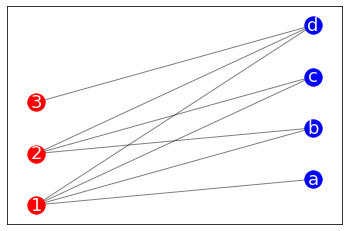

In [107]:
nx.draw_networkx_nodes(B1, pos,nodelist=[1,2,3], node_color="red", label=True)
nx.draw_networkx_nodes(B1, pos,nodelist=["a", "b", "c","d"], node_color="blue", label=True)
nx.draw_networkx_edges(B1, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(B1, pos, labels, font_size=18, font_color="whitesmoke")

In [106]:
X = set(["a", "b", "c","d"])
P = bipartite.projected_graph(B1,X)

In [108]:
options = {
    "font_size": 25,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

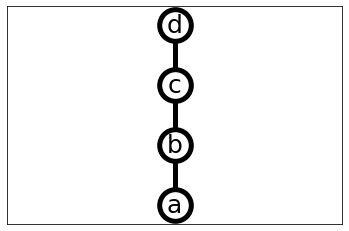

In [110]:
nx.draw_networkx(P, pos, **options)

### L-Bipartite weighted graph projection
We need weights on these edges, because two team could have more than one same fan.

In [111]:
P = bipartite.weighted_projected_graph(B1,X)

In [112]:
P.edges(data = True)

EdgeDataView([('c', 'd', {'weight': 2}), ('c', 'a', {'weight': 1}), ('c', 'b', {'weight': 2}), ('d', 'a', {'weight': 1}), ('d', 'b', {'weight': 2}), ('a', 'b', {'weight': 1})])